In [2]:
using PyPlot

CONSTANTS - Create a Type

In [3]:
struct Params
#structure contains # of points N and Domain Spice L
    N::Int
    L::Float64
end

In [4]:
struct Params2D
    #contains number of points Nx and Ny and the length of the 
    #2D grid Lx and Ly
    Nx::Int
    Ny::Int
    Lx::Float64
    Ly::Float64
end

Defining the Grid Space

In [5]:
function dX(grid::Params)
    #computing grid space h
    return (grid.L/(grid.N-1))
end

dX (generic function with 1 method)

In [6]:
function dX_2D(grid::Params2D)
    #computes grid space hx
    return (grid.Lx/(grid.Nx-1))
end

dX_2D (generic function with 1 method)

In [7]:
function dY_2D(grid::Params2D)
    #computes grid space hy
    return (grid.Ly/(grid.Ny-1))
end

dY_2D (generic function with 1 method)

In [8]:
function functionOnGrid(u::Function, grid::Params)::Array{Float64,1}
    #1D Function is computed on the grid
    ux=zeros(grid.N)
    h=dX(grid)
    for i in 1:grid.N
        x=(i-1)*h
        ux[i]=u(x)
    end
    return ux
end

functionOnGrid (generic function with 1 method)

FUNCTION THAT CONSTRUCTS 1D FUNCTION

USING THE SAME NAME FOR EFFICIENCY - apparently Julia allows this

In [9]:
function functionOnGrid(u::Function, grid::Params2D)::Array{Float64,2}
    uxy=zeros(grid.Nx,grid.Ny)
    hx=dX_2D(grid)
    hy=dY_2D(grid)
    for i in 1:grid.Nx, j in 1:grid.Ny
        x = (i-1)*hx
        y= (j-1)*hy
        uxy[i,j]=u(x,y)
    end
    return uxy
end 

functionOnGrid (generic function with 2 methods)

In [10]:
function Deriv1D(u::Array{Float64,1},grid::Params)::Array{Float64}
    #Derivative of a function is computed on a 1D grid
    dudx = zeros(grid.N)
    h = dX(grid)
    for i in 1:grid.N
        if i == 1
            dudx[i] = (u[i+1] - u[i])/h
        elseif i == grid.N
            dudx[i] = (u[i]-u[i-1])/h
        else
            dudx[i] = (u[i+1]-u[i-1])/2h
        end
    end
    return dudx
end
    

Deriv1D (generic function with 1 method)

In [11]:
function DerivX_2D(u::Array{Float64,2}, grid::Params2D)::Array{Float64}
    dudx= zeros(grid.Nx,grid.Ny)
    hx = dX_2D(grid)

    for i in 1:grid.Nx, j in 1:grid.Ny
        if i==1
            dudx[i,j] = (u[i+1,j] - u[i,j])/hx
        elseif i==grid.Nx
            dudx[i,j] = (u[i,j] - u[i-1,j])/hx
        else
            dudx[i,j] = (u[i+1,j]-u[i-1,j])/2hx
        end
    end
    return dudx
end

DerivX_2D (generic function with 1 method)

In [12]:
function DerivY_2D(u::Array{Float64,2},grid::Params2D)::Array{Float64}
    dudy= zeros(grid.Nx,grid.Ny)
    hy = dY_2D(grid)

    for i in 1:grid.Nx, j in 1:grid.Ny
        if j == 1
            dudy[i,j] = (u[i,j+1] - u[i,j])/hy
        elseif j== grid.Ny
            dudy[i,j] = (u[i,j]-u[i,j-1])/hy
        else
            dudy[i,j] = (u[i,j+1]-u[i,j-1])/2hy
        end
    end
    return dudy
end

DerivY_2D (generic function with 1 method)

TESTING THE FUNCTIONS

In [13]:
p=Params(101,1.0)

Params(101, 1.0)

In [14]:
dX(p)

0.01

In [15]:
x = functionOnGrid(x->x,Params(100,2));
#101 points and identity map gives the coordinates

In [16]:
sinx=functionOnGrid(x->sin(pi*x),Params(100,2));

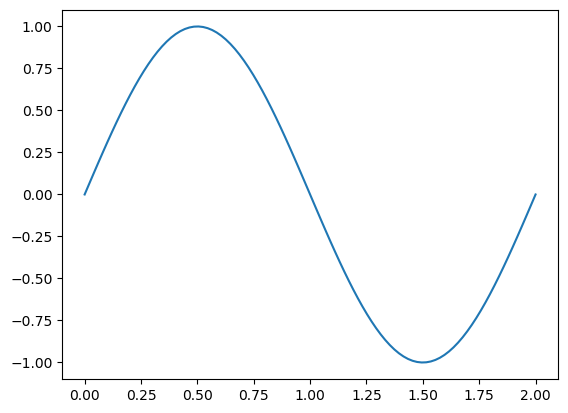

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1392e7c90>

In [17]:
plot(x,sinx)

1D CONVERGENCE TEST

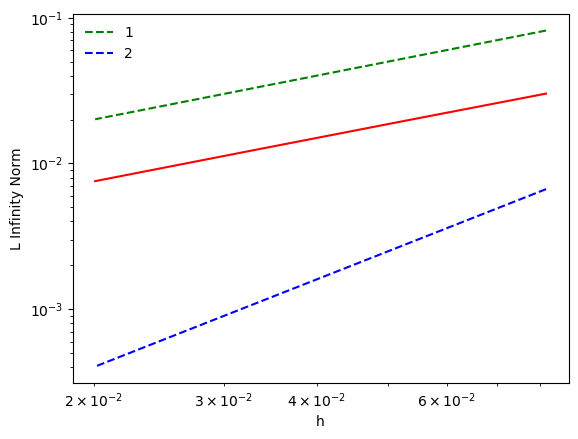

In [18]:
H = []
E = []

for N in 50:200
    grid = Params(N,4)
    u = functionOnGrid(x->sin(x),grid)
    dUdx = functionOnGrid(x->cos(x),grid) #known derivative of sin(x)
    
    #L infinity norm: difference between the numerical derivative and
    #the analytical one, while taking the maximum of it's abs. value
    error = maximum(abs.(Deriv1D(u,grid) - dUdx))
    
    h = dX(grid)
    #append h to the array H and error to the array E
    append!(H,h) 
    append!(E,error)
    
end

loglog(H,E,"r-") #plotting error vs h
loglog(H,H,"g--",label="1") #first order convergence
loglog(H,H.^2,"b--",label="2") #second order convergence
xlabel("h")
ylabel("L Infinity Norm")
legend(loc="best",frameon=false)
show()

In [19]:
sinxcosy = functionOnGrid((x,y)->sin(x)*cos(y), Params2D(100,200,10.0,10.0));

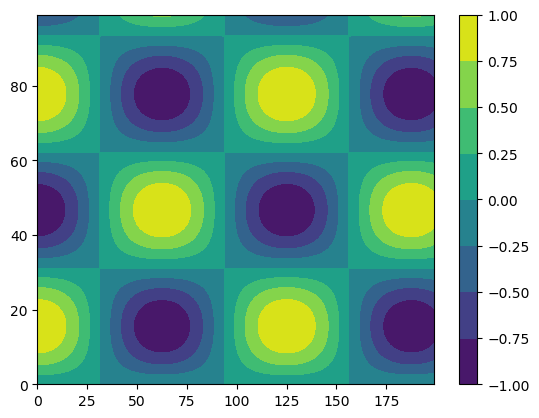

PyObject <matplotlib.colorbar.Colorbar object at 0x143496790>

In [22]:
contourf(sinxcosy)
colorbar()

In [30]:
x2y2= functionOnGrid((x,y)->x^2+y^2,Params2D(10,10,1.0,1.0));

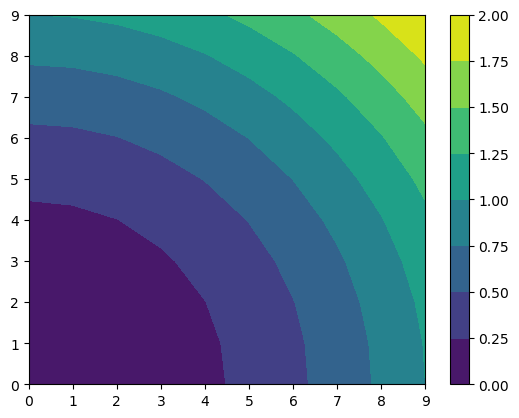

PyObject <matplotlib.colorbar.Colorbar object at 0x143ab6990>

In [31]:
contourf(x2y2)
colorbar()

In [32]:
typeof(sinxcosy)

Array{Float64,2}

In [42]:
cosxcosy = DerivX_2D(sinxcosy,Params2D(100,100,1.0,1.0));

2D CONVERGENCE TESTS

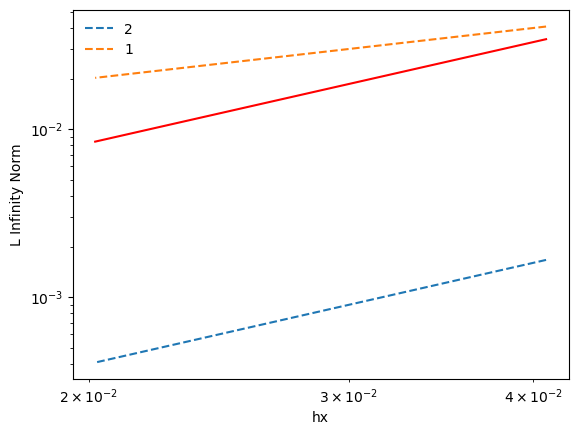

In [22]:
Hx = []
Ex = []
Hy = []
Ey = []

for Nx in 50:100, Ny in 50:100
    grid = Params2D(Nx,Ny,4,4)
    u = functionOnGrid((x,y)->sin(pi*x)*cos(pi*y),grid)
    #analytical derivatives
    dUdx = functionOnGrid((x,y)->pi*cos(pi*x)*cos(pi*y),grid)
    dUdy = functionOnGrid((x,y)->sin(pi*x)*(-pi)*sin(pi*y),grid)
    errorx = maximum(abs.(DerivX_2D(u,grid)-dUdx))
    errory = maximum(abs.(DerivY_2D(u,grid)-dUdy))
    hx = 2/(Nx-1)
    hy = 2/(Ny-1)
    append!(Hx,hx)
    append!(Ex,errorx)
    append!(Hy,hy)
    append!(Ey,errory)
end

loglog(Hx,Ex,"r-")
loglog(Hx,Hx.^2,"--", label="2")
loglog(Hx,Hx,"--",label="1")
xlabel("hx")
ylabel("L Infinity Norm")
legend(loc="best", frameon=false)
show()

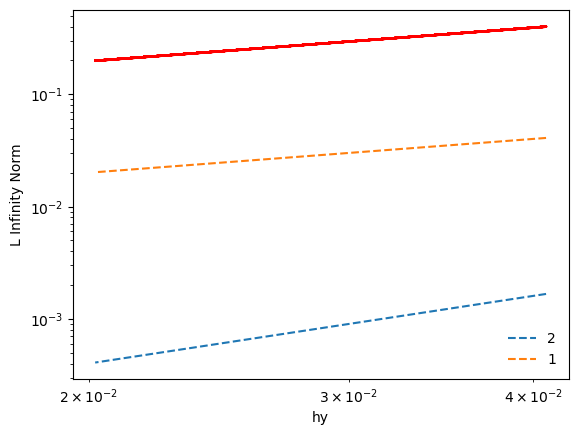

In [23]:
Hx = []
Ex = []
Hy = []
Ey = []

for Nx in 50:100, Ny in 50:100
    grid = Params2D(Nx,Ny,4,4)
    u = functionOnGrid((x,y)->sin(pi*x)*cos(pi*y),grid)
    #analytical derivatives
    dUdx = functionOnGrid((x,y)->pi*cos(pi*x)*cos(pi*y),grid)
    dUdy = functionOnGrid((x,y)->sin(pi*x)*(-pi)*sin(pi*y),grid)
    errorx = maximum(abs.(DerivX_2D(u,grid)-dUdx))
    errory = maximum(abs.(DerivY_2D(u,grid)-dUdy))
    hx = 2/(Nx-1)
    hy = 2/(Ny-1)
    append!(Hx,hx)
    append!(Ex,errorx)
    append!(Hy,hy)
    append!(Ey,errory)
end

loglog(Hy,Ey,"r-")
loglog(Hy,Hy.^2,"--", label="2")
loglog(Hy,Hy,"--",label="1")
xlabel("hy")
ylabel("L Infinity Norm")
legend(loc="best", frameon=false)
show()

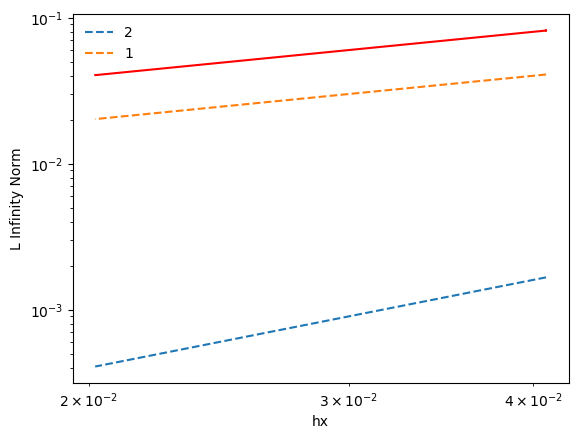

In [24]:
Hx = []
Ex = []

for Nx in 50:100, Ny in 50:100
    grid = Params2D(Nx,Ny,4,4)
    u = functionOnGrid((x,y)->x^2+y^2,grid)
    #analytical derivatives
    dUdx = functionOnGrid((x,y)->2x,grid)

    errorx = maximum(abs.(DerivX_2D(u,grid)-dUdx))

    hx = 2/(Nx-1)

    append!(Hx,hx)
    append!(Ex,errorx)

end

loglog(Hx,Ex,"r-")
loglog(Hx,Hx.^2,"--", label="2")
loglog(Hx,Hx,"--",label="1")
xlabel("hx")
ylabel("L Infinity Norm")
legend(loc="best", frameon=false)
show()

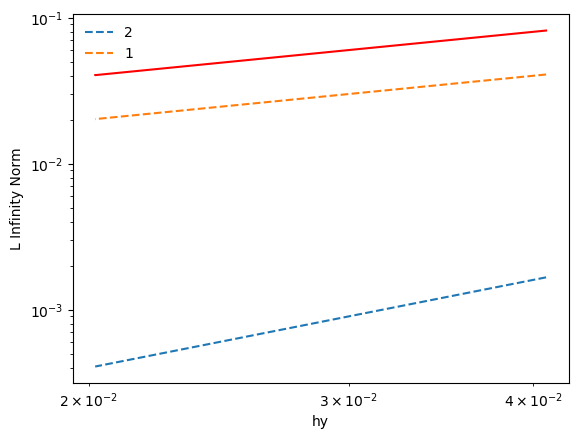

In [25]:
Hy = []
Ey = []

for Nx in 50:100, Ny in 50:100
    grid = Params2D(Nx,Ny,4,4)
    u = functionOnGrid((x,y)->x^2+y^2,grid)
    #analytical derivatives
    dUdy = functionOnGrid((x,y)->2y,grid)

    errory = maximum(abs.(DerivY_2D(u,grid)-dUdy))

    hy = 2/(Ny-1)

    append!(Hy,hy)
    append!(Ey,errory)

end

loglog(Hy,Ey,"r-")
loglog(Hy,Hy.^2,"--", label="2")
loglog(Hy,Hy,"--",label="1")
xlabel("hy")
ylabel("L Infinity Norm")
legend(loc="best", frameon=false)
show()